In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
#create new lists to store api data
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
#API calls
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : aasiaat
Processing Record 2 of Set 1 : dikson
Processing Record 3 of Set 1 : xiamen
Processing Record 4 of Set 1 : new norfolk
City not found. Skipping...
Processing Record 5 of Set 1 : alihe
Processing Record 6 of Set 1 : sioux lookout
Processing Record 7 of Set 1 : lorengau
Processing Record 8 of Set 1 : busselton
Processing Record 9 of Set 1 : port elizabeth
Processing Record 10 of Set 1 : havre-saint-pierre
City not found. Skipping...
Processing Record 11 of Set 1 : ialibu
Processing Record 12 of Set 1 : avarua
Processing Record 13 of Set 1 : faanui
Processing Record 14 of Set 1 : richards bay
Processing Record 15 of Set 1 : hermanus
City not found. Skipping...
Processing Record 16 of Set 1 : albany
City not found. Skipping...
Processing Record 17 of Set 1 : rikitea
Processing Record 18 of Set 1 : bangkalan
Processing Record 19 of Set 1 : georgetown
Processing Record 20 of Set 1 : puerto ayora
Pr

Processing Record 33 of Set 4 : sorong
Processing Record 34 of Set 4 : lar
Processing Record 35 of Set 4 : hithadhoo
Processing Record 36 of Set 4 : asbestos
Processing Record 37 of Set 4 : padang
Processing Record 38 of Set 4 : liverpool
Processing Record 39 of Set 4 : kavaratti
Processing Record 40 of Set 4 : yeniseysk
Processing Record 41 of Set 4 : longyearbyen
Processing Record 42 of Set 4 : karratha
Processing Record 43 of Set 4 : hambantota
Processing Record 44 of Set 4 : cap malheureux
Processing Record 45 of Set 4 : baft
Processing Record 46 of Set 4 : coquimbo
Processing Record 47 of Set 4 : saint-jean-port-joli
Processing Record 48 of Set 4 : paamiut
Processing Record 49 of Set 4 : antsohihy
City not found. Skipping...
Processing Record 50 of Set 4 : talca
Processing Record 0 of Set 5 : nsanje
Processing Record 1 of Set 5 : thaba-tseka
Processing Record 2 of Set 5 : meulaboh
Processing Record 3 of Set 5 : paraiso
Processing Record 4 of Set 5 : merauke
Processing Record 5 of 

Processing Record 18 of Set 8 : tacuati
Processing Record 19 of Set 8 : karabuk
Processing Record 20 of Set 8 : tagusao
Processing Record 21 of Set 8 : san ramon
Processing Record 22 of Set 8 : ancud
Processing Record 23 of Set 8 : lesozavodsk
Processing Record 24 of Set 8 : nanortalik
Processing Record 25 of Set 8 : sao felix do xingu
Processing Record 26 of Set 8 : buenos aires
Processing Record 27 of Set 8 : tucurui
Processing Record 28 of Set 8 : ossora
Processing Record 29 of Set 8 : camacha
Processing Record 30 of Set 8 : casper
Processing Record 31 of Set 8 : thompson
Processing Record 32 of Set 8 : evensk
City not found. Skipping...
Processing Record 33 of Set 8 : anuppur
Processing Record 34 of Set 8 : port hardy
Processing Record 35 of Set 8 : mamallapuram
Processing Record 36 of Set 8 : nenton
Processing Record 37 of Set 8 : tubuala
Processing Record 38 of Set 8 : the valley
Processing Record 39 of Set 8 : thunder bay
Processing Record 40 of Set 8 : norman wells
Processing R

In [5]:
city_df = pd.DataFrame({"City":city_name_list,
    "Cloudiness":cloudiness_list,
    "Country":country_list,
    "Date":date_list,
    "Humidity":humidity_list,
    "Lat":lat_list,
    "Lng":lng_list,
    "Temp":max_temp_list,
    "Wind Speed":wind_speed_list})

#export to csv
city_df.to_csv(output_data_file)



In [6]:
#check to see if there are any cities where humidity is greater than 100
#by sorting values in humidity column
city_df.sort_values(["Humidity"], axis = 0, ascending=False)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Wind Speed
343,Kiryat Gat,93,IL,1647207533,100,31.6100,34.7642,48.88,3.76
509,Balikpapan,20,ID,1647207588,100,-1.2675,116.8289,76.19,4.61
306,Iskateley,76,RU,1647207521,100,67.6803,53.1512,-3.48,4.27
430,Porto-Vecchio,100,FR,1647207361,100,41.5910,9.2795,53.26,8.05
414,Bintulu,20,MY,1647207557,100,3.1667,113.0333,77.41,2.30
...,...,...,...,...,...,...,...,...,...
113,Pitiquito,0,MX,1647207460,9,30.7000,-112.0833,80.64,13.22
288,Tessalit,0,ML,1647207515,9,20.1986,1.0114,75.92,8.16
271,Kayes,7,ML,1647207510,9,14.0000,-11.0000,88.88,8.39
331,Jining,100,CN,1647207530,1,35.4050,116.5814,57.00,7.18


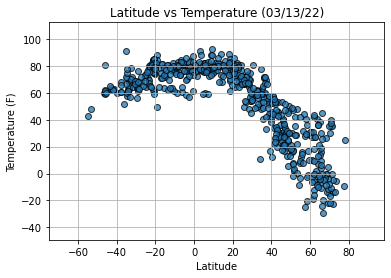

In [7]:


plt.scatter(city_df['Lat'],city_df['Temp'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Temperature ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Temperature (F)')
plt.xlim(min(city_df['Lat'])-20,max(city_df['Lat'])+20)
plt.ylim(min(city_df['Temp'])-20,max(city_df['Temp'])+20)
plt.grid()
plt.savefig("lat_vs_temp.png")

The above figure demonstrates two interesting relationships.
1. As latitude in the Northern hemisphere increases, temperatures drop. 
2. Temperature also drops as latitude increases in the Southern hemisphere, but the decrease is not as steep as it is in the Northern hemisphere. I believe this can be explained by the distribution of the world population by lattitude; there are fewer people in the southern hemisphere, so therefore there will be fewer cities to pull data from. The website below illustrates this point, and I believe the distribution of cities in the randomly generated dataset I'm using also proves this point (I created dataframes for each hemisphere below)

https://www.datagraver.com/case/world-population-distribution-by-latitude-and-longitude-2020

In [8]:
s_hemisphere = city_df[city_df["Lat"]<0]
s_hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Wind Speed
3,New Norfolk,100,AU,1647207423,67,-42.7826,147.0587,62.10,1.01
6,Lorengau,26,PG,1647207425,75,-2.0226,147.2712,83.62,8.34
7,Busselton,12,AU,1647207425,90,-33.6500,115.3333,63.36,7.74
8,Port Elizabeth,100,ZA,1647207425,94,-33.9180,25.5701,63.10,19.57
10,Ialibu,87,PG,1647207426,89,-6.2821,143.9935,60.64,1.39
...,...,...,...,...,...,...,...,...,...
536,Kabinda,96,CD,1647207597,96,-6.1333,24.4833,64.09,2.35
538,Gikongoro,100,RW,1647207598,92,-2.4640,29.5739,56.73,4.59
542,Coyhaique,40,CL,1647207557,55,-45.5752,-72.0662,59.61,8.05
548,Kisanga,99,TZ,1647207601,88,-7.4362,37.7034,73.29,1.81


In [9]:
n_hemisphere = city_df[city_df["Lat"]>0]
n_hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Wind Speed
0,Aasiaat,100,GL,1647207422,93,68.7098,-52.8699,-0.42,7.90
1,Dikson,100,RU,1647207422,97,73.5069,80.5464,-5.26,16.64
2,Amoy,0,CN,1647207423,88,24.4798,118.0819,66.25,2.24
4,Alihe,100,CN,1647207423,97,50.5667,123.7167,16.03,1.48
5,Sioux Lookout,100,CA,1647207424,57,50.1001,-91.9170,17.67,8.05
...,...,...,...,...,...,...,...,...,...
545,Bilibino,96,RU,1647207362,92,68.0546,166.4372,-8.43,2.30
546,Valle Hermoso,100,MX,1647207600,59,25.6667,-97.8333,69.66,14.50
547,Itoman,20,JP,1647207600,96,26.1247,127.6694,66.97,3.44
550,Dātāganj,0,IN,1647207602,39,28.0333,79.4000,67.37,2.62


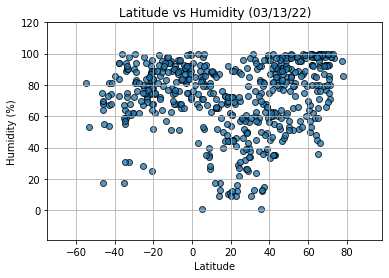

In [10]:
plt.scatter(city_df['Lat'],city_df['Humidity'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Humidity ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Humidity (%)')
plt.xlim(min(city_df['Lat'])-20,max(city_df['Lat'])+20)
plt.ylim(min(city_df['Humidity'])-20,max(city_df['Humidity'])+20)
plt.grid()
plt.savefig("lat_vs_humidity.png")

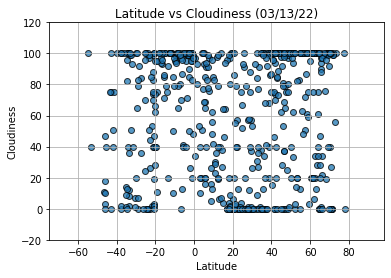

In [11]:
plt.scatter(city_df['Lat'],city_df['Cloudiness'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Cloudiness ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness')
plt.xlim(min(city_df['Lat'])-20,max(city_df['Lat'])+20)
plt.ylim(min(city_df['Cloudiness'])-20,max(city_df['Cloudiness'])+20)
plt.grid()
plt.savefig("lat_vs_cloudiness.png")

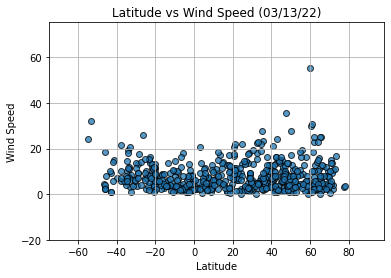

In [12]:
plt.scatter(city_df['Lat'],city_df['Wind Speed'],alpha=0.75,edgecolors='black')
plt.title(f"Latitude vs Wind Speed ({time.strftime('%m/%d/%y')})")
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.xlim(min(city_df['Lat'])-20,max(city_df['Lat'])+20)
plt.ylim(min(city_df['Wind Speed'])-20,max(city_df['Wind Speed'])+20)
plt.grid()
plt.savefig("lat_vs_wind.png")

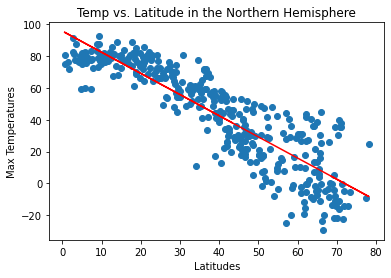

In [13]:
north = city_df.loc[city_df["Lat"] >= 0]
south = city_df.loc[city_df["Lat"] < 0]

x_values = north['Lat']
y_values = north['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.title("Temp vs. Latitude in the Northern Hemisphere")
plt.ylabel('Max Temperatures')
plt.xlabel('Latitudes')
plt.show()


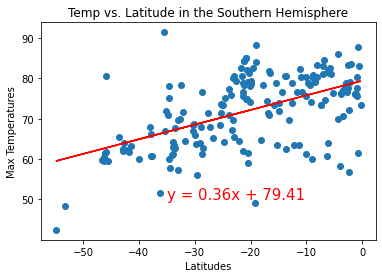

In [14]:
y_values = south['Temp']
x_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,50),fontsize=15,color="red")
plt.title("Temp vs. Latitude in the Southern Hemisphere")
plt.ylabel('Max Temperatures')
plt.xlabel('Latitudes')
plt.show()

As I predicted in my analysis of the Temperature (F) vs. Latitude graph, the temperature increases as latititude approaches the equator in both hemispheres. However, the relationship between latitude and temperature is stronger in the northern hemisphere. 

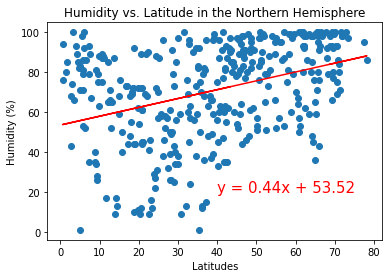

In [15]:
y_values = north['Humidity']
x_values = north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Humidity vs. Latitude in the Northern Hemisphere")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitudes')
plt.show()

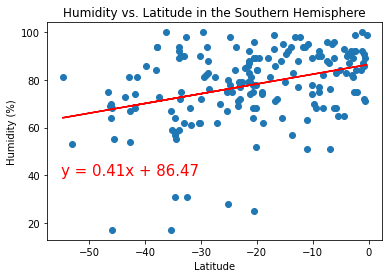

In [16]:
y_values = south['Humidity']
x_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title("Humidity vs. Latitude in the Southern Hemisphere")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.show()

There is a small positive correlation between humidity and latitude the southern and northern hemisphere (cities near the equator are more humid than those further away), but it is not very strong. In contrast, it appears that cities in higher latitudes in the northern hemisphere are associated with higher humidity. 

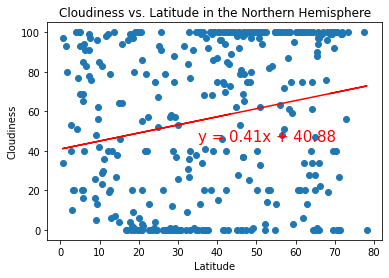

In [17]:
y_values = north['Cloudiness']
x_values = north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,45),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude in the Northern Hemisphere")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()


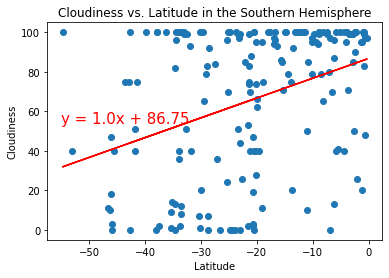

In [18]:
y_values = south['Cloudiness']
x_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 54),fontsize=15,color="red")
plt.title("Cloudiness vs. Latitude in the Southern Hemisphere")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()


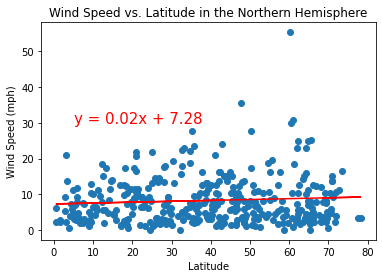

In [19]:
y_values = north['Wind Speed']
x_values = north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude in the Northern Hemisphere")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()

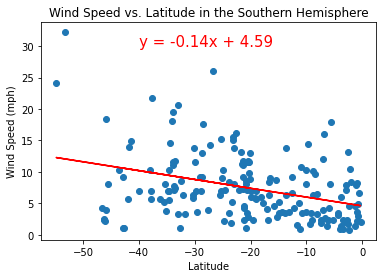

In [20]:
y_values = south['Wind Speed']
x_values = south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.title("Wind Speed vs. Latitude in the Southern Hemisphere")
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()

Latitude has an almost negligable relationship to wind speed in both hemispheres, with the Southern hemisphere showing a slight negative relationship between latitude and wind speed. 